# Week 4 Prediction

In our last week prediction, the price of AMD would go down and then go up, it did fall after i sold the stocks of AMD and now their price begins to go up, so i decide to buy them.
And i also want to use LSTM to predict Microsoft, Google and UnitedHealthGroup

## Microsoft

In [1]:
import pandas as pd
MSFT = pd.read_csv('MSFT.csv')
MSFT

,Date,Close/Last,Volume,Open,High,Low
0,12/12/16,62.17,20186390,$61.82,$62.30,$61.72
1,12/13/16,62.98,35072050,$62.50,$63.42,$62.24
2,12/14/16,62.68,30335770,$63,$63.45,$62.53
3,12/15/16,62.58,27661180,$62.70,$63.15,$62.30
4,12/16/16,62.30,42452660,$62.95,$62.95,$62.12
...,...,...,...,...,...,...
1253,12/3/21,323.01,41779280,$331.99,$332.70,$318.03
1254,12/6/21,326.19,30032560,$323.95,$327.45,$319.23
1255,12/7/21,334.92,31021940,$331.64,$335.80,$330.10
1256,12/8/21,334.97,24760990,$335.31,$335.50,$330.80


In [3]:
y = MSFT.reset_index()['Close/Last']
y

0        62.17
1        62.98
2        62.68
3        62.58
4        62.30
         ...  
1253    323.01
1254    326.19
1255    334.92
1256    334.97
1257    333.10
Name: Close/Last, Length: 1258, dtype: float64

Text(0, 0.5, 'MSFT Stock Price')

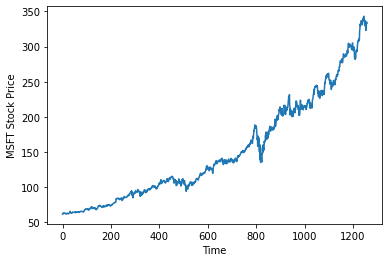

In [4]:
import matplotlib.pyplot as plt
plt.plot(y)
plt.xlabel('Time')
plt.ylabel('MSFT Stock Price')

In [5]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
y = scaler.fit_transform(np.array(y).reshape(-1,1))

In [6]:
training_size = int(len(y)*0.65)
test_size = len(y) - training_size
train_data,test_data=y[0:training_size,:],y[training_size:len(y),:1]

In [7]:
len(train_data),len(test_data)

(817, 441)

In [8]:
import numpy
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [9]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [10]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [12]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [13]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 8s 223ms/step - loss: 0.0112 - val_loss: 0.1019
Epoch 2/100
12/12 [==============================] - 1s 101ms/step - loss: 0.0029 - val_loss: 0.0039
Epoch 3/100
12/12 [==============================] - 1s 99ms/step - loss: 6.3402e-04 - val_loss: 0.0036
Epoch 4/100
12/12 [==============================] - 1s 99ms/step - loss: 4.2197e-04 - val_loss: 0.0024
Epoch 5/100
12/12 [==============================] - 1s 102ms/step - loss: 2.4433e-04 - val_loss: 0.0035
Epoch 6/100
12/12 [==============================] - 1s 99ms/step - loss: 2.2032e-04 - val_loss: 0.0022
Epoch 7/100
12/12 [==============================] - 1s 111ms/step - loss: 2.4527e-04 - val_loss: 0.0032
Epoch 8/100
12/12 [==============================] - 1s 98ms/step - loss: 2.1889e-04 - val_loss: 0.0045
Epoch 9/100
12/12 [==============================] - 1s 98ms/step - loss: 2.1874e-04 - val_loss: 0.0040
Epoch 10/100
12/12 [==============================] - 1s 99ms/step -

12/12 [==============================] - 1s 97ms/step - loss: 1.1462e-04 - val_loss: 0.0040
Epoch 79/100
12/12 [==============================] - 1s 98ms/step - loss: 1.1818e-04 - val_loss: 0.0080
Epoch 80/100
12/12 [==============================] - 1s 97ms/step - loss: 1.0730e-04 - val_loss: 0.0041
Epoch 81/100
12/12 [==============================] - 1s 97ms/step - loss: 1.1019e-04 - val_loss: 0.0096
Epoch 82/100
12/12 [==============================] - 1s 98ms/step - loss: 1.0728e-04 - val_loss: 0.0082
Epoch 83/100
12/12 [==============================] - 1s 97ms/step - loss: 1.0795e-04 - val_loss: 0.0063
Epoch 84/100
12/12 [==============================] - 1s 101ms/step - loss: 1.0861e-04 - val_loss: 0.0072
Epoch 85/100
12/12 [==============================] - 1s 110ms/step - loss: 1.0101e-04 - val_loss: 0.0065
Epoch 86/100
12/12 [==============================] - 1s 101ms/step - loss: 1.0979e-04 - val_loss: 0.0064
Epoch 87/100
12/12 [==============================] - 1s 103ms/st

In [14]:
import tensorflow as tf

In [15]:
tf.__version__

'2.7.0'

In [16]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [17]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [18]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

112.8722855377201

In [19]:
math.sqrt(mean_squared_error(ytest,test_predict))

232.07806718959944

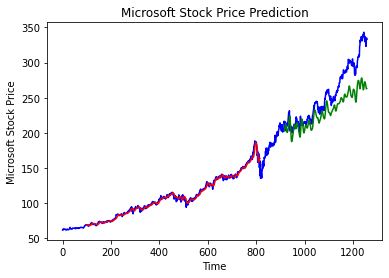

In [21]:
look_back=100
trainPredictPlot = numpy.empty_like(y)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
testPredictPlot = numpy.empty_like(y)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(y)-1, :] = test_predict
plt.plot(scaler.inverse_transform(y), color = 'blue', label = 'Actual Stock Price')
plt.plot(trainPredictPlot, color = 'red', label = 'Train Predict Price')
plt.plot(testPredictPlot, color = 'green', label = 'Test Predict Price')
plt.title('Microsoft Stock Price Prediction')
plt.xlabel("Time")
plt.ylabel('Microsoft Stock Price')
plt.show()

So the bule line is the actual stock price of Microsoft, the red line is the training predict price and the green one is the testing predict price, we can see comparison of the prediction and the real value.

In [22]:
len(test_data)

441

In [23]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [24]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [25]:
from numpy import array
lst_output=[]
n_steps=100
i=0
while(i<30):
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
        
print(lst_output)

[0.73683196]
101
1 day input [0.79723814 0.80980176 0.80759512 0.79866178 0.79752287 0.79851941
 0.79286045 0.79254013 0.80072606 0.79855501 0.80926789 0.80905435
 0.80503257 0.79830587 0.80012101 0.81030003 0.82111969 0.82734812
 0.82193829 0.8135744  0.83507136 0.86208492 0.86311706 0.85589209
 0.85372104 0.84332847 0.8455707  0.85934441 0.85325835 0.8530804
 0.85066021 0.85062462 0.84720789 0.84731466 0.83677973 0.83129872
 0.83585436 0.84581984 0.86372211 0.86514575 0.84610457 0.82628039
 0.82805994 0.84151333 0.84500125 0.84425383 0.8258177  0.7879133
 0.78962167 0.78221874 0.80777307 0.78645407 0.80656298 0.82204506
 0.82823789 0.82823789 0.82603125 0.82122647 0.83343417 0.85635477
 0.86155106 0.87251308 0.87585863 0.87294017 0.88486315 0.87916859
 0.87550272 0.88254974 0.92903157 0.93323131 0.95910595 0.95109798
 0.96448019 0.96757661 0.97626081 0.97490835 0.97821832 0.97451685
 0.95618749 0.96198882 0.97725736 0.97494394 0.98718724 0.9857992
 0.99345126 1.         0.98832616 0.

8 day output [[0.345439]]
9 day input [0.80072606 0.79855501 0.80926789 0.80905435 0.80503257 0.79830587
 0.80012101 0.81030003 0.82111969 0.82734812 0.82193829 0.8135744
 0.83507136 0.86208492 0.86311706 0.85589209 0.85372104 0.84332847
 0.8455707  0.85934441 0.85325835 0.8530804  0.85066021 0.85062462
 0.84720789 0.84731466 0.83677973 0.83129872 0.83585436 0.84581984
 0.86372211 0.86514575 0.84610457 0.82628039 0.82805994 0.84151333
 0.84500125 0.84425383 0.8258177  0.7879133  0.78962167 0.78221874
 0.80777307 0.78645407 0.80656298 0.82204506 0.82823789 0.82823789
 0.82603125 0.82122647 0.83343417 0.85635477 0.86155106 0.87251308
 0.87585863 0.87294017 0.88486315 0.87916859 0.87550272 0.88254974
 0.92903157 0.93323131 0.95910595 0.95109798 0.96448019 0.96757661
 0.97626081 0.97490835 0.97821832 0.97451685 0.95618749 0.96198882
 0.97725736 0.97494394 0.98718724 0.9857992  0.99345126 1.
 0.98832616 0.98067409 0.98149269 0.9522013  0.97693704 0.95544008
 0.95362494 0.95152507 0.92846211

16 day output [[0.46309334]]
17 day input [0.82111969 0.82734812 0.82193829 0.8135744  0.83507136 0.86208492
 0.86311706 0.85589209 0.85372104 0.84332847 0.8455707  0.85934441
 0.85325835 0.8530804  0.85066021 0.85062462 0.84720789 0.84731466
 0.83677973 0.83129872 0.83585436 0.84581984 0.86372211 0.86514575
 0.84610457 0.82628039 0.82805994 0.84151333 0.84500125 0.84425383
 0.8258177  0.7879133  0.78962167 0.78221874 0.80777307 0.78645407
 0.80656298 0.82204506 0.82823789 0.82823789 0.82603125 0.82122647
 0.83343417 0.85635477 0.86155106 0.87251308 0.87585863 0.87294017
 0.88486315 0.87916859 0.87550272 0.88254974 0.92903157 0.93323131
 0.95910595 0.95109798 0.96448019 0.96757661 0.97626081 0.97490835
 0.97821832 0.97451685 0.95618749 0.96198882 0.97725736 0.97494394
 0.98718724 0.9857992  0.99345126 1.         0.98832616 0.98067409
 0.98149269 0.9522013  0.97693704 0.95544008 0.95362494 0.95152507
 0.92846211 0.93978005 0.97085098 0.97102894 0.96437342 0.73683196
 0.72330236 0.683351

24 day output [[0.75825834]]
25 day input [0.85372104 0.84332847 0.8455707  0.85934441 0.85325835 0.8530804
 0.85066021 0.85062462 0.84720789 0.84731466 0.83677973 0.83129872
 0.83585436 0.84581984 0.86372211 0.86514575 0.84610457 0.82628039
 0.82805994 0.84151333 0.84500125 0.84425383 0.8258177  0.7879133
 0.78962167 0.78221874 0.80777307 0.78645407 0.80656298 0.82204506
 0.82823789 0.82823789 0.82603125 0.82122647 0.83343417 0.85635477
 0.86155106 0.87251308 0.87585863 0.87294017 0.88486315 0.87916859
 0.87550272 0.88254974 0.92903157 0.93323131 0.95910595 0.95109798
 0.96448019 0.96757661 0.97626081 0.97490835 0.97821832 0.97451685
 0.95618749 0.96198882 0.97725736 0.97494394 0.98718724 0.9857992
 0.99345126 1.         0.98832616 0.98067409 0.98149269 0.9522013
 0.97693704 0.95544008 0.95362494 0.95152507 0.92846211 0.93978005
 0.97085098 0.97102894 0.96437342 0.73683196 0.72330236 0.68335104
 0.62439781 0.55540192 0.48532575 0.42281181 0.37498862 0.34543899
 0.33332601 0.33485603 0

In [26]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [27]:
import matplotlib.pyplot as plt

In [28]:
len(y)

1258

In [29]:
Y=y.tolist()
Y.extend(lst_output)

Text(0, 0.5, 'Stock Price')

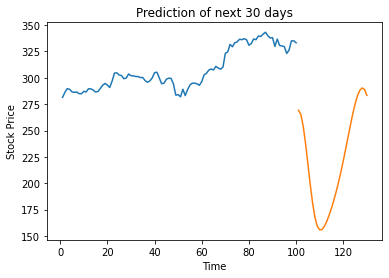

In [30]:
plt.plot(day_new,scaler.inverse_transform(y[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.title('Prediction of next 30 days')
plt.xlabel('Time')
plt.ylabel('Stock Price')

So we can see the stock price of Microsoft will decrease first and then increase in the next 30 days in our prediction, so i will take the short action for now and make a buy action once its price increase.

## Google

In [31]:
import pandas as pd
GOOG = pd.read_csv('GOOG.csv')

In [32]:
y1 = GOOG.reset_index()['Close/Last']
y1

0        807.90
1        815.34
2        817.89
3        815.65
4        809.84
         ...   
1253    2840.03
1254    2863.10
1255    2945.39
1256    2963.73
1257    2952.77
Name: Close/Last, Length: 1258, dtype: float64

Text(0, 0.5, 'Google Stock Price')

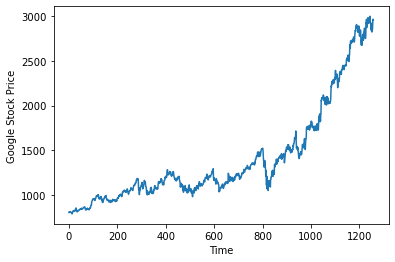

In [33]:
plt.plot(y1)
plt.xlabel('Time')
plt.ylabel('Google Stock Price')

In [34]:
scaler1 = MinMaxScaler(feature_range=(0,1))
y1 = scaler1.fit_transform(np.array(y1).reshape(-1,1))

In [35]:
training_size1 = int(len(y1)*0.65)
test_size1 = len(y1) - training_size1
train_data1,test_data1=y1[0:training_size1,:],y1[training_size1:len(y1),:1]

In [36]:
import numpy
def create_dataset1(dataset1, time_step=1):
    dataX1, dataY1 = [], []
    for u in range(len(dataset1)-time_step-1):
        b = dataset1[u:(u+time_step), 0]
        dataX1.append(b)
        dataY1.append(dataset1[u + time_step, 0])
    return numpy.array(dataX1), numpy.array(dataY1)

In [37]:
time_step = 100
X1_train, y1_train = create_dataset1(train_data1, time_step)
X1_test, y1test = create_dataset1(test_data1, time_step)

In [38]:
X1_train = X1_train.reshape(X1_train.shape[0],X1_train.shape[1] , 1)
X1_test = X1_test.reshape(X1_test.shape[0],X1_test.shape[1] , 1)

In [39]:
model1 = Sequential()
model1.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model1.add(LSTM(50,return_sequences=True))
model1.add(LSTM(50))
model1.add(Dense(1))
model1.compile(loss='mean_squared_error', optimizer='adam')
model1.fit(X1_train,y1_train,validation_data=(X1_test,y1test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 9s 226ms/step - loss: 0.0075 - val_loss: 0.1317
Epoch 2/100
12/12 [==============================] - 1s 117ms/step - loss: 0.0017 - val_loss: 0.0508
Epoch 3/100
12/12 [==============================] - 2s 130ms/step - loss: 8.6511e-04 - val_loss: 0.0201
Epoch 4/100
12/12 [==============================] - 1s 127ms/step - loss: 5.0818e-04 - val_loss: 0.0014
Epoch 5/100
12/12 [==============================] - 2s 128ms/step - loss: 4.7883e-04 - val_loss: 0.0022
Epoch 6/100
12/12 [==============================] - 1s 124ms/step - loss: 4.5996e-04 - val_loss: 0.0040
Epoch 7/100
12/12 [==============================] - 1s 116ms/step - loss: 4.3406e-04 - val_loss: 0.0033
Epoch 8/100
12/12 [==============================] - 1s 120ms/step - loss: 4.3079e-04 - val_loss: 0.0026
Epoch 9/100
12/12 [==============================] - 2s 133ms/step - loss: 4.1563e-04 - val_loss: 0.0029
Epoch 10/100
12/12 [==============================] - 1s 123ms/

12/12 [==============================] - 1s 103ms/step - loss: 1.7426e-04 - val_loss: 0.0175
Epoch 79/100
12/12 [==============================] - 1s 105ms/step - loss: 1.7089e-04 - val_loss: 0.0110
Epoch 80/100
12/12 [==============================] - 1s 105ms/step - loss: 1.7809e-04 - val_loss: 0.0109
Epoch 81/100
12/12 [==============================] - 1s 102ms/step - loss: 2.0363e-04 - val_loss: 0.0171
Epoch 82/100
12/12 [==============================] - 1s 103ms/step - loss: 1.7575e-04 - val_loss: 0.0120
Epoch 83/100
12/12 [==============================] - 1s 104ms/step - loss: 2.1619e-04 - val_loss: 0.0191
Epoch 84/100
12/12 [==============================] - 1s 103ms/step - loss: 1.7049e-04 - val_loss: 0.0136
Epoch 85/100
12/12 [==============================] - 1s 102ms/step - loss: 1.7306e-04 - val_loss: 0.0137
Epoch 86/100
12/12 [==============================] - 1s 111ms/step - loss: 1.6434e-04 - val_loss: 0.0161
Epoch 87/100
12/12 [==============================] - 1s 11

In [40]:
train_predict1 = model1.predict(X1_train)
test_predict1 = model1.predict(X1_test)

In [41]:
train_predict1 = scaler1.inverse_transform(train_predict1)
test_predict1 = scaler1.inverse_transform(test_predict1)

In [42]:
math.sqrt(mean_squared_error(y1_train,train_predict1))

1139.22116907846

In [43]:
math.sqrt(mean_squared_error(y1test,test_predict1))

2056.0635705387263

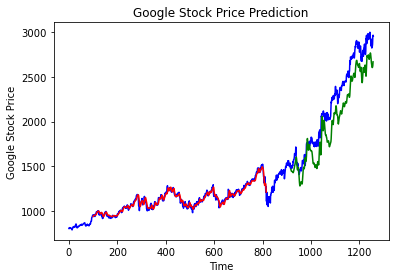

In [45]:
look_back=100
trainPredictPlot1 = numpy.empty_like(y1)
trainPredictPlot1[:, :] = np.nan
trainPredictPlot1[look_back:len(train_predict1)+look_back, :] = train_predict1
testPredictPlot1 = numpy.empty_like(y1)
testPredictPlot1[:, :] = numpy.nan
testPredictPlot1[len(train_predict1)+(look_back*2)+1:len(y1)-1, :] = test_predict1
plt.plot(scaler1.inverse_transform(y1), color = 'blue', label = 'Actual Stock Price')
plt.plot(trainPredictPlot1, color = 'red', label = 'Train Predict Price')
plt.plot(testPredictPlot1, color = 'green', label = 'Test Predict Price')
plt.title('Google Stock Price Prediction')
plt.xlabel("Time")
plt.ylabel('Google Stock Price')
plt.show()

So the bule line is the actual stock price of Google, the red line is the training predict price and the green one is the testing predict price.

In [46]:
len(test_data1)

441

In [47]:
x1_input=test_data1[341:].reshape(1,-1)
x1_input.shape

(1, 100)

In [48]:
temp1_input=list(x1_input)
temp1_input=temp1_input[0].tolist()

In [49]:
from numpy import array
lst1_output=[]
n_steps=100
i=0
while(i<30):
    if(len(temp1_input)>100):
        x1_input=np.array(temp1_input[1:])
        print("{} day input {}".format(i,x1_input))
        x1_input=x1_input.reshape(1,-1)
        x1_input=x1_input.reshape((1, n_steps, 1))
        y1hat = model1.predict(x1_input, verbose=0)
        print("{} day output {}".format(i,y1hat))
        temp1_input.extend(y1hat[0].tolist())
        temp1_input=temp1_input[1:]
        lst1_output.extend(y1hat.tolist())
        i=i+1
    else:
        x1_input = x1_input.reshape((1, n_steps, 1))
        y1hat = model1.predict(x1_input, verbose=0)
        print(y1hat[0])
        temp1_input.extend(y1hat[0].tolist())
        print(len(temp1_input))
        lst1_output.extend(y1hat.tolist())
        i=i+1
        

[0.894013]
101
1 day input [0.80568157 0.84735882 0.85661338 0.83724232 0.87529488 0.87242324
 0.86288742 0.86404878 0.87108496 0.86650759 0.87672389 0.87206939
 0.88272574 0.88176399 0.8769734  0.88527528 0.89011577 0.89539631
 0.88044386 0.86944273 0.87153862 0.88741199 0.91111091 0.92218008
 0.92959734 0.92380417 0.94706304 0.95238441 0.95335523 0.95805509
 0.94055763 0.94466321 0.94957175 0.94422316 0.9428622  0.91868241
 0.93189737 0.93382086 0.95092364 0.94348824 0.91799285 0.89911628
 0.9019607  0.9133066  0.92176726 0.93083128 0.92046073 0.87289958
 0.85950316 0.85335614 0.87936869 0.85320643 0.87465069 0.8886414
 0.90370273 0.9087882  0.900881   0.87851582 0.88879564 0.92117751
 0.92314637 0.93593943 0.94010398 0.92678468 0.92784623 0.888655
 0.88757077 0.90446033 0.96714633 0.9638029  0.98373648 0.94246298
 0.96002395 0.97059864 0.98574617 0.99104939 0.99267348 0.99165275
 0.96420665 0.96305437 0.98947068 0.98742016 0.98219406 0.98374555
 1.         0.99172534 0.96791301 0.96

8 day output [[0.38720185]]
9 day input [0.87108496 0.86650759 0.87672389 0.87206939 0.88272574 0.88176399
 0.8769734  0.88527528 0.89011577 0.89539631 0.88044386 0.86944273
 0.87153862 0.88741199 0.91111091 0.92218008 0.92959734 0.92380417
 0.94706304 0.95238441 0.95335523 0.95805509 0.94055763 0.94466321
 0.94957175 0.94422316 0.9428622  0.91868241 0.93189737 0.93382086
 0.95092364 0.94348824 0.91799285 0.89911628 0.9019607  0.9133066
 0.92176726 0.93083128 0.92046073 0.87289958 0.85950316 0.85335614
 0.87936869 0.85320643 0.87465069 0.8886414  0.90370273 0.9087882
 0.900881   0.87851582 0.88879564 0.92117751 0.92314637 0.93593943
 0.94010398 0.92678468 0.92784623 0.888655   0.88757077 0.90446033
 0.96714633 0.9638029  0.98373648 0.94246298 0.96002395 0.97059864
 0.98574617 0.99104939 0.99267348 0.99165275 0.96420665 0.96305437
 0.98947068 0.98742016 0.98219406 0.98374555 1.         0.99172534
 0.96791301 0.963195   0.9662617  0.93054094 0.96091312 0.92795057
 0.92027473 0.93764517 0

16 day output [[-0.18757701]]
17 day input [ 0.89011577  0.89539631  0.88044386  0.86944273  0.87153862  0.88741199
  0.91111091  0.92218008  0.92959734  0.92380417  0.94706304  0.95238441
  0.95335523  0.95805509  0.94055763  0.94466321  0.94957175  0.94422316
  0.9428622   0.91868241  0.93189737  0.93382086  0.95092364  0.94348824
  0.91799285  0.89911628  0.9019607   0.9133066   0.92176726  0.93083128
  0.92046073  0.87289958  0.85950316  0.85335614  0.87936869  0.85320643
  0.87465069  0.8886414   0.90370273  0.9087882   0.900881    0.87851582
  0.88879564  0.92117751  0.92314637  0.93593943  0.94010398  0.92678468
  0.92784623  0.888655    0.88757077  0.90446033  0.96714633  0.9638029
  0.98373648  0.94246298  0.96002395  0.97059864  0.98574617  0.99104939
  0.99267348  0.99165275  0.96420665  0.96305437  0.98947068  0.98742016
  0.98219406  0.98374555  1.          0.99172534  0.96791301  0.963195
  0.9662617   0.93054094  0.96091312  0.92795057  0.92027473  0.93764517
  0.9288941

24 day output [[-0.41395187]]
25 day input [ 0.92959734  0.92380417  0.94706304  0.95238441  0.95335523  0.95805509
  0.94055763  0.94466321  0.94957175  0.94422316  0.9428622   0.91868241
  0.93189737  0.93382086  0.95092364  0.94348824  0.91799285  0.89911628
  0.9019607   0.9133066   0.92176726  0.93083128  0.92046073  0.87289958
  0.85950316  0.85335614  0.87936869  0.85320643  0.87465069  0.8886414
  0.90370273  0.9087882   0.900881    0.87851582  0.88879564  0.92117751
  0.92314637  0.93593943  0.94010398  0.92678468  0.92784623  0.888655
  0.88757077  0.90446033  0.96714633  0.9638029   0.98373648  0.94246298
  0.96002395  0.97059864  0.98574617  0.99104939  0.99267348  0.99165275
  0.96420665  0.96305437  0.98947068  0.98742016  0.98219406  0.98374555
  1.          0.99172534  0.96791301  0.963195    0.9662617   0.93054094
  0.96091312  0.92795057  0.92027473  0.93764517  0.92889417  0.93935998
  0.97669122  0.98501125  0.9800392   0.89401299  0.87638372  0.83164686
  0.7705656

In [50]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [51]:
len(y1)

1258

Text(0, 0.5, 'Stock Price')

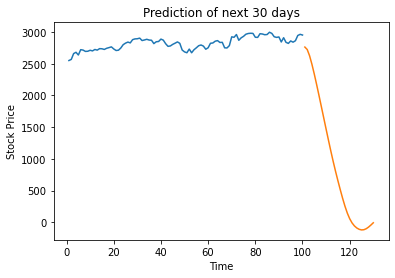

In [52]:
Y1=y1.tolist()
Y1.extend(lst1_output)
plt.plot(day_new,scaler1.inverse_transform(y1[1158:]))
plt.plot(day_pred,scaler1.inverse_transform(lst1_output))
plt.title('Prediction of next 30 days')
plt.xlabel('Time')
plt.ylabel('Stock Price')

## UnitedHealthGroup

In [53]:
import pandas as pd
UNH = pd.read_csv('UNH.csv')

In [54]:
y2 = UNH.reset_index()['Close/Last']
y2

0       159.49
1       160.54
2       159.86
3       160.62
4       163.94
         ...  
1253    449.32
1254    460.11
1255    464.73
1256    468.86
1257    473.32
Name: Close/Last, Length: 1258, dtype: float64

Text(0, 0.5, 'UNH Stock Price')

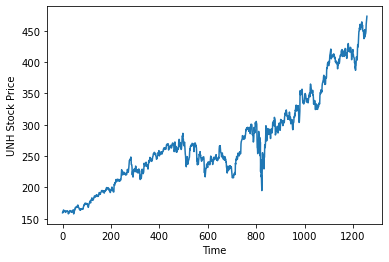

In [55]:
plt.plot(y2)
plt.xlabel('Time')
plt.ylabel('UNH Stock Price')

In [56]:
scaler2 = MinMaxScaler(feature_range=(0,1))
y2 = scaler2.fit_transform(np.array(y2).reshape(-1,1))

In [57]:
training_size2 = int(len(y2)*0.65)
test_size2 = len(y2) - training_size2
train_data2,test_data2=y2[0:training_size2,:],y2[training_size2:len(y2),:1]

In [58]:
import numpy
def create_dataset2(dataset2, time_step=1):
    dataX2, dataY2 = [], []
    for o in range(len(dataset2)-time_step-1):
        c = dataset2[o:(o+time_step), 0]
        dataX2.append(c)
        dataY2.append(dataset2[o + time_step, 0])
    return numpy.array(dataX2), numpy.array(dataY2)

In [59]:
time_step = 100
X2_train, y2_train = create_dataset2(train_data2, time_step)
X2_test, y2test = create_dataset2(test_data2, time_step)

In [60]:
X2_train = X2_train.reshape(X2_train.shape[0],X2_train.shape[1] , 1)
X2_test = X2_test.reshape(X2_test.shape[0],X2_test.shape[1] , 1)

In [61]:
model2 = Sequential()
model2.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model2.add(LSTM(50,return_sequences=True))
model2.add(LSTM(50))
model2.add(Dense(1))
model2.compile(loss='mean_squared_error', optimizer='adam')
model2.fit(X2_train,y2_train,validation_data=(X2_test,y2test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 7s 211ms/step - loss: 0.0233 - val_loss: 0.0888
Epoch 2/100
12/12 [==============================] - 1s 104ms/step - loss: 0.0040 - val_loss: 0.0215
Epoch 3/100
12/12 [==============================] - 1s 103ms/step - loss: 0.0022 - val_loss: 0.0252
Epoch 4/100
12/12 [==============================] - 1s 103ms/step - loss: 0.0014 - val_loss: 0.0135
Epoch 5/100
12/12 [==============================] - 1s 112ms/step - loss: 0.0010 - val_loss: 0.0064
Epoch 6/100
12/12 [==============================] - 2s 135ms/step - loss: 9.8944e-04 - val_loss: 0.0045
Epoch 7/100
12/12 [==============================] - 2s 151ms/step - loss: 9.5745e-04 - val_loss: 0.0047
Epoch 8/100
12/12 [==============================] - 2s 125ms/step - loss: 9.6668e-04 - val_loss: 0.0040
Epoch 9/100
12/12 [==============================] - 1s 102ms/step - loss: 9.7172e-04 - val_loss: 0.0037
Epoch 10/100
12/12 [==============================] - 1s 104ms/step - loss:

12/12 [==============================] - 1s 104ms/step - loss: 4.8996e-04 - val_loss: 0.0109
Epoch 79/100
12/12 [==============================] - 1s 107ms/step - loss: 6.2362e-04 - val_loss: 0.0047
Epoch 80/100
12/12 [==============================] - 1s 101ms/step - loss: 5.0880e-04 - val_loss: 0.0047
Epoch 81/100
12/12 [==============================] - 1s 99ms/step - loss: 4.9216e-04 - val_loss: 0.0098
Epoch 82/100
12/12 [==============================] - 1s 99ms/step - loss: 5.2178e-04 - val_loss: 0.0050
Epoch 83/100
12/12 [==============================] - 1s 101ms/step - loss: 5.4718e-04 - val_loss: 0.0039
Epoch 84/100
12/12 [==============================] - 1s 100ms/step - loss: 4.5986e-04 - val_loss: 0.0066
Epoch 85/100
12/12 [==============================] - 1s 106ms/step - loss: 4.6855e-04 - val_loss: 0.0033
Epoch 86/100
12/12 [==============================] - 1s 108ms/step - loss: 4.6245e-04 - val_loss: 0.0066
Epoch 87/100
12/12 [==============================] - 1s 102m

In [62]:
train_predict2 = model2.predict(X2_train)
test_predict2 = model2.predict(X2_test)

In [63]:
train_predict2 = scaler2.inverse_transform(train_predict2)
test_predict2 = scaler2.inverse_transform(test_predict2)

In [64]:
math.sqrt(mean_squared_error(y2_train,train_predict2))

240.5996588213846

In [65]:
math.sqrt(mean_squared_error(y2test,test_predict2))

360.41218094831817

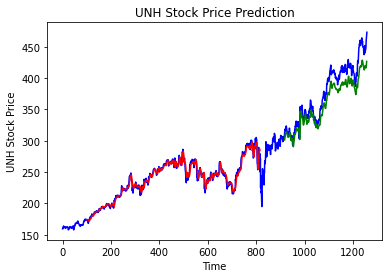

In [66]:
look_back=100
trainPredictPlot2 = numpy.empty_like(y2)
trainPredictPlot2[:, :] = np.nan
trainPredictPlot2[look_back:len(train_predict2)+look_back, :] = train_predict2
testPredictPlot2 = numpy.empty_like(y2)
testPredictPlot2[:, :] = numpy.nan
testPredictPlot2[len(train_predict2)+(look_back*2)+1:len(y2)-1, :] = test_predict2
plt.plot(scaler2.inverse_transform(y2), color = 'blue', label = 'Actual Stock Price')
plt.plot(trainPredictPlot2, color = 'red', label = 'Train Predict Price')
plt.plot(testPredictPlot2, color = 'green', label = 'Test Predict Price')
plt.title('UNH Stock Price Prediction')
plt.xlabel("Time")
plt.ylabel('UNH Stock Price')
plt.show()

So the bule line is the actual stock price of UnitedHealthGroup, the red line is the training predict price and the green one is the testing predict price, we can see the preiction and the real value are really close so it looks like the model is pretty decent.

In [67]:
len(test_data2)

441

In [68]:
x2_input=test_data2[341:].reshape(1,-1)
x2_input.shape

(1, 100)

In [69]:
temp2_input=list(x2_input)
temp2_input=temp2_input[0].tolist()

In [70]:
from numpy import array
lst2_output=[]
n_steps=100
i=0
while(i<30):
    if(len(temp2_input)>100):
        x2_input=np.array(temp2_input[1:])
        print("{} day input {}".format(i,x2_input))
        x2_input=x2_input.reshape(1,-1)
        x2_input=x2_input.reshape((1, n_steps, 1))
        y2hat = model2.predict(x2_input, verbose=0)
        print("{} day output {}".format(i,y2hat))
        temp2_input.extend(y2hat[0].tolist())
        temp2_input=temp2_input[1:]
        lst2_output.extend(y2hat.tolist())
        i=i+1
    else:
        x2_input = x2_input.reshape((1, n_steps, 1))
        y2hat = model2.predict(x2_input, verbose=0)
        print(y2hat[0])
        temp2_input.extend(y2hat[0].tolist())
        print(len(temp2_input))
        lst2_output.extend(y2hat.tolist())
        i=i+1
        

[0.87708163]
101
1 day input [0.81770668 0.82382008 0.81064302 0.81558442 0.79680076 0.80601837
 0.80646183 0.81707317 0.83712385 0.83598353 0.80319924 0.81564777
 0.80218562 0.8050681  0.79227114 0.78663288 0.79838454 0.82226798
 0.83674374 0.82261641 0.85609756 0.86186253 0.84808362 0.84190687
 0.83028191 0.82112765 0.8271777  0.82572062 0.81929047 0.82271143
 0.84285714 0.84016471 0.83503326 0.81650301 0.81384226 0.78013937
 0.81374723 0.80747545 0.82324992 0.82109598 0.83161229 0.80798226
 0.80684194 0.79531201 0.79318974 0.79018055 0.78444726 0.76338296
 0.7690529  0.73842255 0.74377574 0.72660754 0.7469433  0.7495407
 0.78264175 0.79455179 0.78356034 0.7780171  0.77899905 0.8322458
 0.85666772 0.84573963 0.84497941 0.87890402 0.90167881 0.92347165
 0.92451695 0.9408299  0.93715553 0.94336395 0.9592968  0.93915109
 0.93259424 0.94935065 0.94754514 0.94453595 0.96610706 0.97158695
 0.95749129 0.9495407  0.95460881 0.92866646 0.92492873 0.92280646
 0.9244536  0.89445676 0.88666455 0

8 day output [[0.61122704]]
9 day input [0.83712385 0.83598353 0.80319924 0.81564777 0.80218562 0.8050681
 0.79227114 0.78663288 0.79838454 0.82226798 0.83674374 0.82261641
 0.85609756 0.86186253 0.84808362 0.84190687 0.83028191 0.82112765
 0.8271777  0.82572062 0.81929047 0.82271143 0.84285714 0.84016471
 0.83503326 0.81650301 0.81384226 0.78013937 0.81374723 0.80747545
 0.82324992 0.82109598 0.83161229 0.80798226 0.80684194 0.79531201
 0.79318974 0.79018055 0.78444726 0.76338296 0.7690529  0.73842255
 0.74377574 0.72660754 0.7469433  0.7495407  0.78264175 0.79455179
 0.78356034 0.7780171  0.77899905 0.8322458  0.85666772 0.84573963
 0.84497941 0.87890402 0.90167881 0.92347165 0.92451695 0.9408299
 0.93715553 0.94336395 0.9592968  0.93915109 0.93259424 0.94935065
 0.94754514 0.94453595 0.96610706 0.97158695 0.95749129 0.9495407
 0.95460881 0.92866646 0.92492873 0.92280646 0.9244536  0.89445676
 0.88666455 0.9170415  0.92663921 0.89417168 0.93246753 0.90782388
 0.90820399 0.9135255  0.

16 day output [[0.61722547]]
17 day input [0.79838454 0.82226798 0.83674374 0.82261641 0.85609756 0.86186253
 0.84808362 0.84190687 0.83028191 0.82112765 0.8271777  0.82572062
 0.81929047 0.82271143 0.84285714 0.84016471 0.83503326 0.81650301
 0.81384226 0.78013937 0.81374723 0.80747545 0.82324992 0.82109598
 0.83161229 0.80798226 0.80684194 0.79531201 0.79318974 0.79018055
 0.78444726 0.76338296 0.7690529  0.73842255 0.74377574 0.72660754
 0.7469433  0.7495407  0.78264175 0.79455179 0.78356034 0.7780171
 0.77899905 0.8322458  0.85666772 0.84573963 0.84497941 0.87890402
 0.90167881 0.92347165 0.92451695 0.9408299  0.93715553 0.94336395
 0.9592968  0.93915109 0.93259424 0.94935065 0.94754514 0.94453595
 0.96610706 0.97158695 0.95749129 0.9495407  0.95460881 0.92866646
 0.92492873 0.92280646 0.9244536  0.89445676 0.88666455 0.9170415
 0.92663921 0.89417168 0.93246753 0.90782388 0.90820399 0.9135255
 0.92397846 0.95815648 0.97279062 0.98587266 1.         0.87708163
 0.83963275 0.78307903 

24 day output [[0.47840327]]
25 day input [0.83028191 0.82112765 0.8271777  0.82572062 0.81929047 0.82271143
 0.84285714 0.84016471 0.83503326 0.81650301 0.81384226 0.78013937
 0.81374723 0.80747545 0.82324992 0.82109598 0.83161229 0.80798226
 0.80684194 0.79531201 0.79318974 0.79018055 0.78444726 0.76338296
 0.7690529  0.73842255 0.74377574 0.72660754 0.7469433  0.7495407
 0.78264175 0.79455179 0.78356034 0.7780171  0.77899905 0.8322458
 0.85666772 0.84573963 0.84497941 0.87890402 0.90167881 0.92347165
 0.92451695 0.9408299  0.93715553 0.94336395 0.9592968  0.93915109
 0.93259424 0.94935065 0.94754514 0.94453595 0.96610706 0.97158695
 0.95749129 0.9495407  0.95460881 0.92866646 0.92492873 0.92280646
 0.9244536  0.89445676 0.88666455 0.9170415  0.92663921 0.89417168
 0.93246753 0.90782388 0.90820399 0.9135255  0.92397846 0.95815648
 0.97279062 0.98587266 1.         0.87708163 0.83963275 0.78307903
 0.72627354 0.6781553  0.64263207 0.62064064 0.61101848 0.61122704
 0.61802191 0.62796688

In [71]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [72]:
len(y2)

1258

Text(0, 0.5, 'Stock Price')

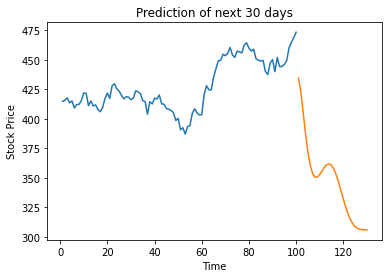

In [73]:
Y2=y2.tolist()
Y2.extend(lst2_output)
plt.plot(day_new,scaler2.inverse_transform(y2[1158:]))
plt.plot(day_pred,scaler2.inverse_transform(lst2_output))
plt.title('Prediction of next 30 days')
plt.xlabel('Time')
plt.ylabel('Stock Price')

The price of UnitedHealthGroup will go down in the next 30 days in our prediction, so I dicide to make a short action to its stock.